# Fit abundance curves to different models

In [15]:
%matplotlib inline

import os
os.chdir("/Volumes/WorkDrive/gimmeSAD")
import implicit_BI
import gimmeSAD
import numpy as np
## For literal_eval
import ast
import matplotlib.pyplot as plt

SIMOUT_DIR = "/Users/iovercast/Desktop/lab-notebooks/gimmeSAD/simout"
OUTFILE = "gimmeSAD.out"
os.chdir(SIMOUT_DIR)
col_rates = [0.01, 0.001]


In [18]:
## quicksort stolen from the internet
def qsort(arr):
     if len(arr) <= 1:
          return arr
     else:
          return qsort([x for x in arr[1:] if x[0]<arr[0][0]])\
                    + [arr[0]] + qsort([x for x in arr[1:] if x[0]>=arr[0][0]])

K_5000-C_0.01-1
[(1, 20), (2, 8), (3, 12), (4, 5), (5, 5), (6, 2), (7, 2), (9, 4), (10, 1), (11, 3), (12, 6), (13, 2), (14, 2), (15, 1), (16, 1), (18, 1), (19, 1), (20, 5), (23, 1), (26, 2), (28, 1), (29, 3), (30, 1), (32, 1), (33, 1), (35, 2), (37, 4), (39, 1), (40, 1), (41, 2), (42, 1), (44, 2), (50, 1), (54, 2), (55, 1), (56, 4), (67, 2), (73, 1), (75, 1), (82, 1), (85, 1), (86, 1), (88, 1), (89, 1), (115, 1), (134, 1), (159, 1), (208, 1), (300, 1), (302, 1), (371, 1), (427, 1), (525, 1)]


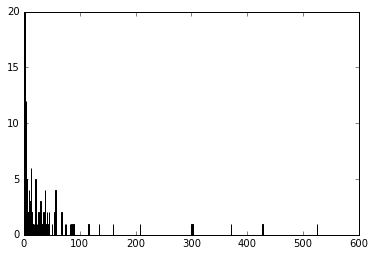

Abundance in octaves - OrderedDict([(1, 20), (2, 20), (4, 14), (8, 19), (16, 16), (32, 23)])

octaves - [(1, 20), (2, 20), (4, 14), (8, 19), (16, 16), (32, 23)]


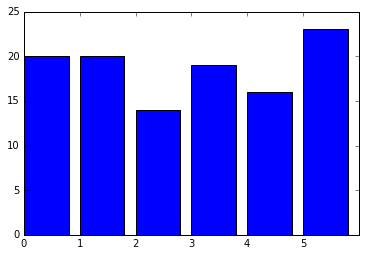

In [53]:
#dirs = os.listdir(SIMOUT_DIR)
dirs = ["K_5000-C_0.01-1"]
for d in dirs:
    if not os.path.isdir(d):
        print("founda file")
        continue
    print(d)
    with open(os.path.join(d, OUTFILE), 'r') as out:
        lines = out.readlines()
        for line in lines:
            if "Raw abundance" in line:
                abund = ast.literal_eval(line.split("OrderedDict")[1])
                abund = qsort(abund)
                print(abund)
                x, y = zip(*abund)
                plt.bar(x, y)
                plt.show()
            if "Abundance in octaves" in line:
                print(line)
                abund = ast.literal_eval(line.split("OrderedDict")[1])
                abund = qsort(abund)
                print("octaves - {}".format(abund))
                x, y = zip(*abund)
                plt.bar(np.arange(len(x)), y)
                plt.xticks(np.arange(len(x)))
